# Esercizio1

1. Importare il dataset autos.csv
2. Visualizzare le struttura e le prime 6 righe
3. Modificare i dati nei seguenti modi:
    * nella colonna seller:
        * privat →→ privato
        * gewerblich →→ negozio
    * nella colonna offerType:
        * angebot →→ offerta
        * gesuch →→ richiesta
    * nella colonna notRepairedDamage:
        * ja →→ si
        * nein →→ no
    * nella colonna vehicleType:
        * limousine →→ limo
        * andere →→ altro
        * kombi →→ s.w.
        * kleinwagen →→ util.
    * eliminare tutte le righe con un anno di registrazione non nell’intervallo [1901,2016] (2 modi possibili)
    * eliminare tutte le righe con prezzo superiore ai 100000 euro
4. Contare il numero di brand di auto disponibili
5. Come sono distribuiti i tipi di veicolo?
6. Tracciare un diagramma a barre delle frequenze assolute del tipo di veicolo
7. Fare un grafico a torta delle frequenze assolute del tipo di veicolo
8. Tracciare il grafico a torta degli anni di registrazione (Attenzione a cosa disegnate)
9. Visualizzare le marche delle auto con powerPS uguale a 30
10. Calcolare media, mediana, max, min, primo e terzo quartile degli anni di registrazione
11. Calcolare lo scarto interquartile degli anni di registrazione (2 modi possibili)
12. Tracciare un istogramma e un boxplot degli anni di registrazione; i conti tornano con i dati precedenti?
13. Visualizzare il grafico a barre dei brand con frequenza maggiore di 5000 e calcolate l’indice di Gini di questo sottoinsieme (per l’indice di Gini non usate il for)
14. Calcolare la moda dei brand
15. Calcolare la funzione cumulativa empirica degli anni di registrazione e plottarla (2 modi possibili)
16. Fare un boxplot della potenza delle auto di marca trabant; quale valore di potenza vi sembra elevato? (potete rispondere a spanne oppure usare un filtro per identificare le offerte relative)
17. Contare il numero di suv dell’Alfa Romeo; perchè non si può usare length?
18. Trovare il modello di auto più comune

In [22]:
autos <- read.csv(file = "autos.csv")
str(autos)

'data.frame':	99999 obs. of  20 variables:
 $ dateCrawled        : Factor w/ 92920 levels "2016-03-05 14:06:27",..: 54149 54078 25031 34867 76262 89615 80243 46564 91141 33862 ...
 $ name               : Factor w/ 72505 levels "!!!!!!!!!!!!!!!!_VERKAUFE_OPEL_CORSA_B_!!!!!!!!!!!!!!!",..: 24360 1203 27855 23618 53075 8365 45201 58584 19694 59169 ...
 $ seller             : Factor w/ 2 levels "gewerblich","privat": 2 2 2 2 2 2 2 2 2 2 ...
 $ offerType          : Factor w/ 2 levels "Angebot","Gesuch": 1 1 1 1 1 1 1 1 1 1 ...
 $ price              : int  480 18300 9800 1500 3600 650 2200 0 14500 999 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : int  1993 2011 2004 2001 2008 1995 2004 1980 2014 1998 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            : int  0 190 163 75 69 102 10

In [23]:
autos[1:6,]

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


In [24]:
levels(autos$seller) <- c(levels(autos$seller), "privato", "negozio")
autos[autos$seller=="privat", "seller"] <- "privato"
autos[autos$seller=="gewerblich", "seller"] <- "negozio"
levels(autos$seller) <- droplevels(autos$seller)

levels(autos$offerType) <- c(levels(autos$offerType), "offerta", "richiesta")
autos[autos$offerType=="Angebot", "offerType"] <- "offerta"
autos[autos$offerType=="Gesuch", "offerType"] <- "richiesta"
levels(autos$offerType) <- droplevels(autos$offerType)

levels(autos$notRepairedDamage) <- c(levels(autos$notRepairedDamage), "si", "no")
autos[autos$notRepairedDamage=="ja", "notRepairedDamage"] <- "si"
autos[autos$notRepairedDamage=="nein", "notRepairedDamage"] <- "no"
levels(autos$notRepairedDamage) <- droplevels(autos$notRepairedDamage)

levels(autos$vehicleType) <- c(levels(autos$vehicleType), "limo", "altro", "s.w.", "util.")
autos[autos$vehicleType=="limousine", "vehicleType"] <- "limo"
autos[autos$vehicleType=="andere", "vehicleType"] <- "altro"
autos[autos$vehicleType=="kombi", "vehicleType"] <- "s.w."
autos[autos$vehicleType=="kleinwagen", "vehicleType"] <- "util."
levels(autos$vehicleType) <- droplevels(autos$vehicleType)

In [26]:
autos <- autos[autos$yearOfRegistration>=1901 & autos$yearOfRegistration<=2016,]

In [28]:
autos <- autos[autos$price<=100000,]

In [29]:
length(unique(autos$brand))

[1] 40

In [30]:
library(ineq)
ineq(autos$vehicleType, type="Gini")

[1] 0.2242716

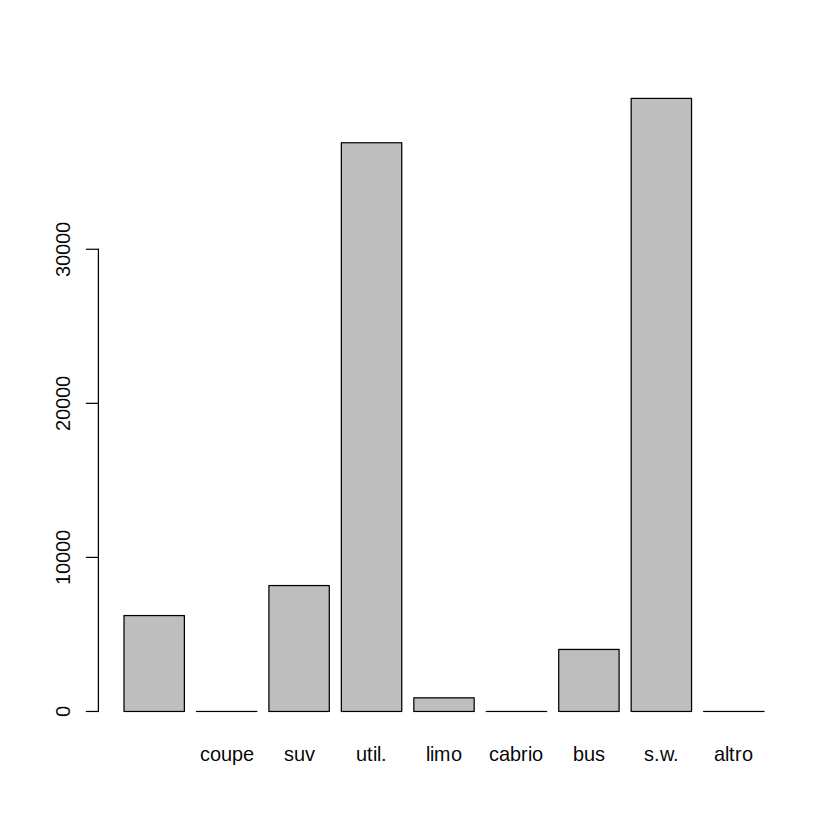

In [33]:
barplot(table(autos$vehicleType))

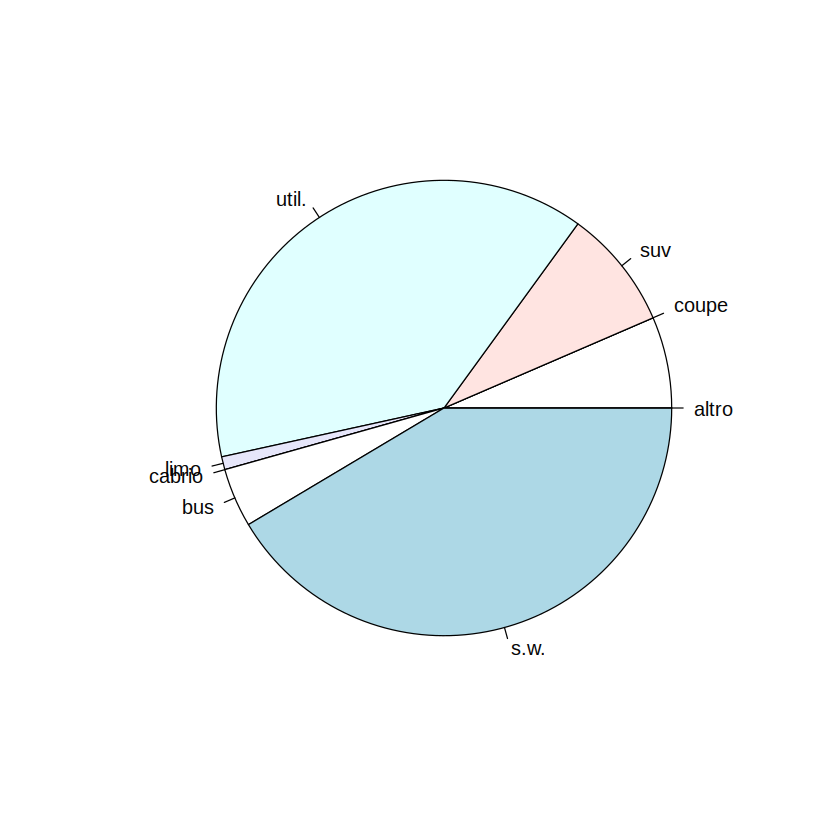

In [34]:
pie(table(autos$vehicleType))

In [35]:
unique(autos[autos$powerPS==30, "brand"])

[1] ford           smart          volkswagen     mercedes_benz  sonstige_autos
[6] opel           fiat          
40 Levels: alfa_romeo audi bmw chevrolet chrysler citroen dacia ... volvo

In [36]:
mean(autos$yearOfRegistration)
median(autos$yearOfRegistration)
max(autos$yearOfRegistration)
min(autos$yearOfRegistration)
quantile(autos$yearOfRegistration, 0.25)
quantile(autos$yearOfRegistration, 0.75)

[1] 2002.796

[1] 2003

[1] 2016

[1] 1910

25% 
1999

75% 
2008

In [38]:
scarto <- quantile(autos$yearOfRegistration, 0.75) - quantile(autos$yearOfRegistration, 0.25)
names(scarto) <- c()
scarto

[1] 9

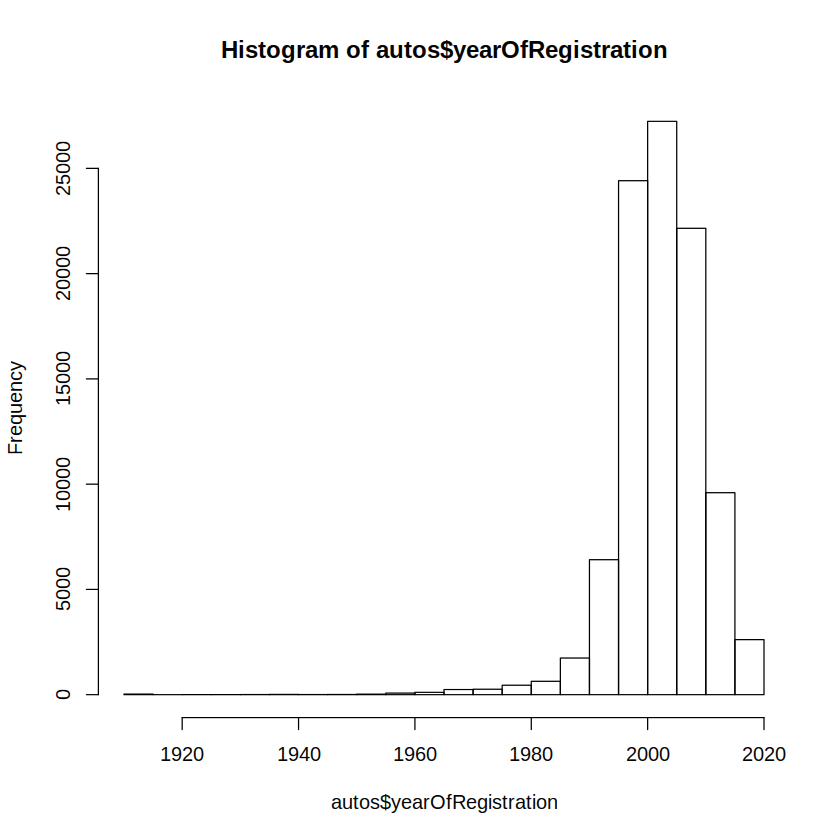

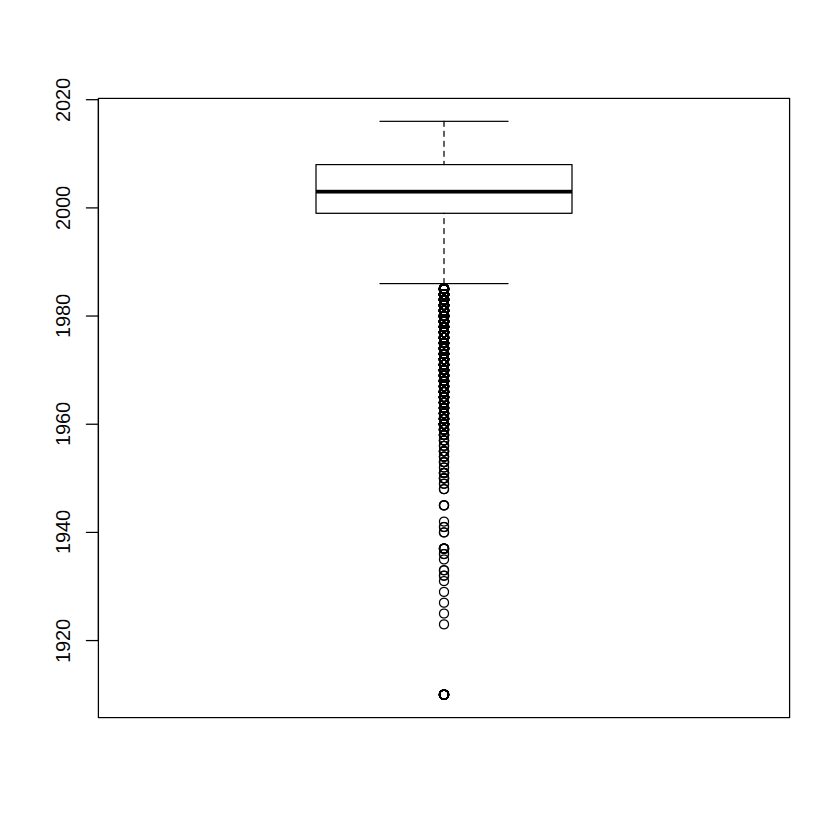

In [39]:
hist(autos$yearOfRegistration)
boxplot(autos$yearOfRegistration)

[1] 0.1928009

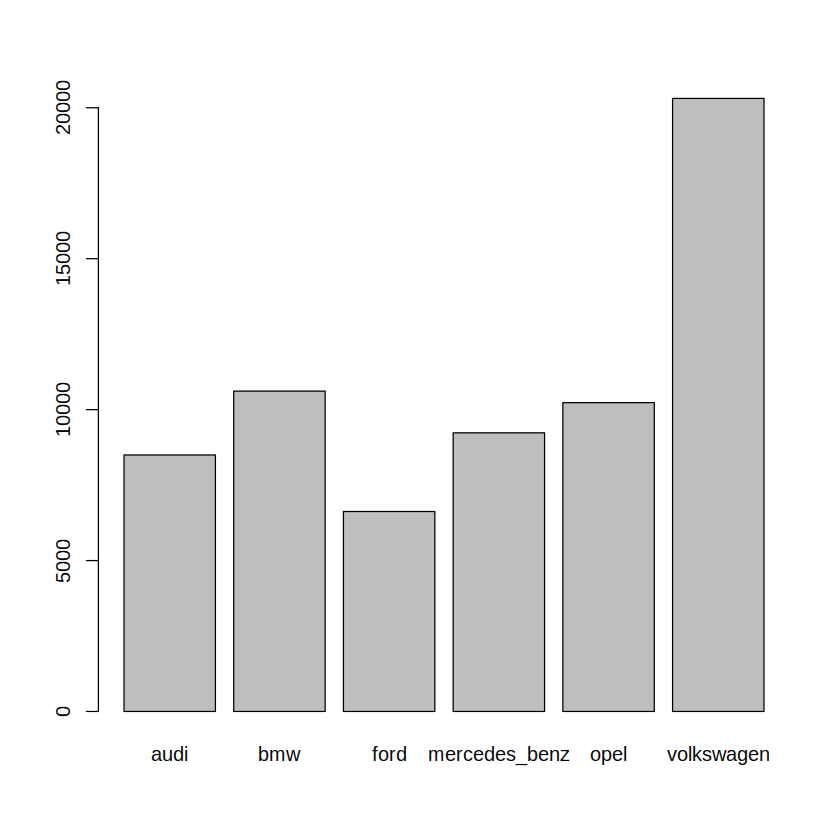

In [55]:
freqbrand <- table(autos$brand)
bigfreqbrand <- c()
index <- 1
for (i in 1:length(freqbrand)) {
    if (freqbrand[i]>5000) {
        bigfreqbrand <- c(bigfreqbrand, freqbrand[i])
        names(bigfreqbrand)[index] <- names(freqbrand)[i]
        index <- index + 1
    }
}
barplot(bigfreqbrand)
ineq(bigfreqbrand, type="Gini")

In [58]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
Mode(autos$brand)

[1] volkswagen
40 Levels: alfa_romeo audi bmw chevrolet chrysler citroen dacia ... volvo

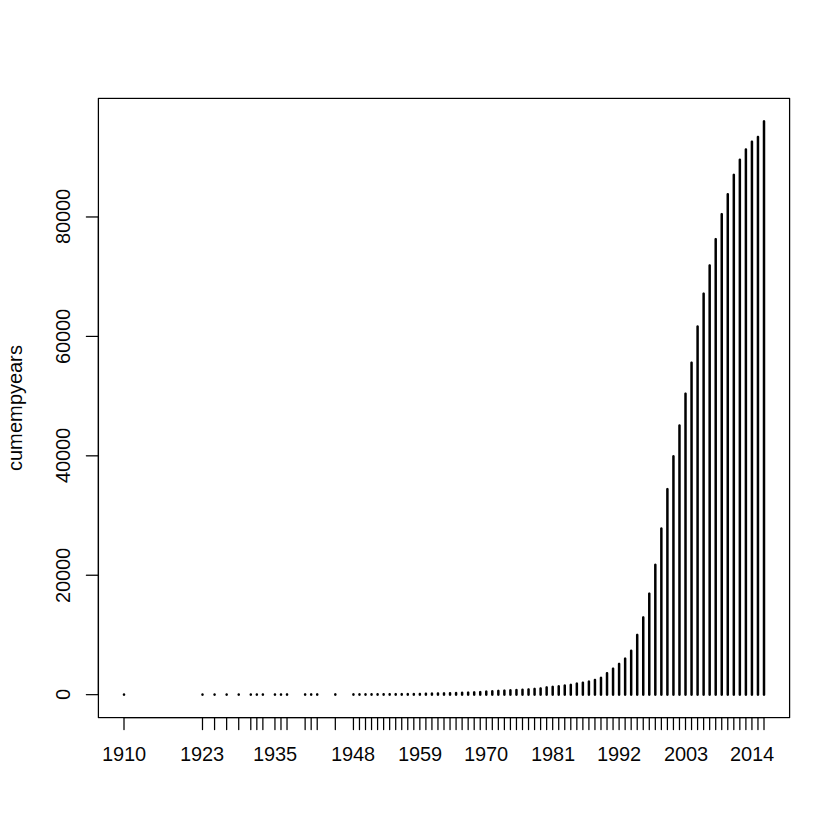

In [66]:
cumempyears <- table(autos$yearOfRegistration)
for (i in 2:length(cumempyears))
    cumempyears[i] <- cumempyears[i] + cumempyears[i-1]
plot(cumempyears)

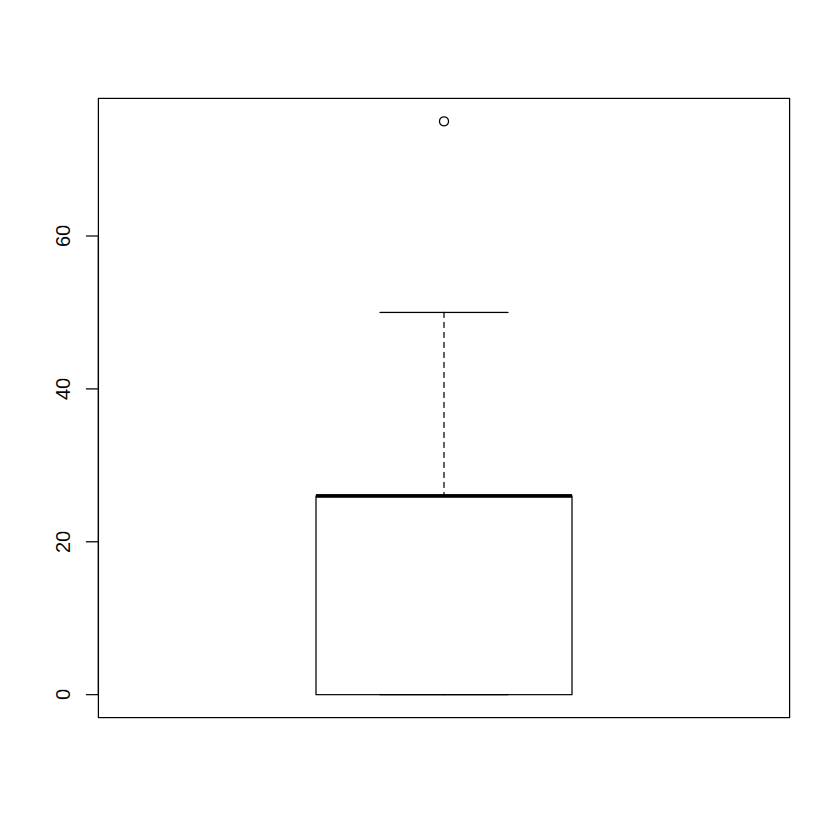

In [67]:
boxplot(autos[autos$brand=="trabant", "powerPS"])

In [72]:
nrow(autos[autos$vehicleType=="suv" & autos$brand=="alfa_romeo",])

[1] 0

In [73]:
Mode(autos$model)

[1] golf
249 Levels:  100 145 147 156 159 1_reihe 1er 200 2_reihe 300c 3_reihe ... zafira